In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
import nltk

import pandas as pd
import re
import string
from textblob import TextBlob, Word, Blobber
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, LeavePOut, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=411606a9ce2100fdd59aa54cfc494f31e68d06ebcd09e48b3e6df88845f72752
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
from autocorrect import Speller
from autocorrect import Speller
from nltk.tokenize import word_tokenize


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/train.csv')

In [ ]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
title,0
author,0
text,0
label,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
!pip install stopwords.words('english')

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install stopwords.words('english')'


In [ ]:
stemmer = PorterStemmer()

def lower_text(text):
    return str(text).lower()

def stem_sentence2(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = []
    for token in tokens:
        stemmed_tokens.append(stemmer.stem(token))
        stemmed_tokens.append(" ")
        return "".join(stemmed_tokens)

def lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
  stop_words = stopwords.words('english')
  return ' '.join([word for word in str(text).split() if word not in stop_words])

def spell_checking(text):
  spell = Speller(lang='en')
  return ' '.join([spell(word)for word in text.split()])

corpus_train=[]
def get_corpus_train(sentence):
    token_words=word_tokenize(sentence)
    for word in token_words:
        corpus_train.append(word)
    return sentence

corpus_test=[]
def get_corpus_test(sentence):
    token_words=word_tokenize(sentence)
    for word in token_words:
        corpus_test.append(word)
    return sentence


def return_corpus(all_Sentences):
  corpus =[]
  for sentence in all_Sentences:
    tokens = word_tokenize(sentence)
    for token in tokens:
      corpus.append(token)
    return set(corpus)






In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df['text'] = df['text'].apply(remove_stopwords)
df['title'] = df['title'].apply(remove_stopwords)


df['text'] = df['text'].apply(lemmatization)
df['title'] = df['title'].apply(lemmatization)

df['text'] = df['text'].apply(lower_text)

In [ ]:
df[df['text']==0]

,id,title,author,text,label


In [ ]:
df['text'][5]

'in trying times, jackie mason voice reason. [in week’s exclusive clip breitbart news, jackie discus looming threat north korea, explains president donald trump could win support hollywood left u. s. need strike first. “if decides bomb them, whole country behind him, everybody realize choice thing do,” jackie says. “except hollywood left. they’ll get nauseous. ” “[trump] could win left over, they’ll fall love minute. if bombed better reason,” jackie explains. “like transgender toilets. ” jackie also say it’s surprise hollywood celebrity didn’t support trump’s strike syrian airfield month. “they infuriated,” says. “because might save lives. that doesn’t mean anything them. if saved environment, climate change! they’d happiest people world. ” still, jackie say he’s got nothing hollywood celebs. they’ve got tough life country. watch jackie’s latest clip above. follow daniel nussbaum twitter: @dznussbaum'

In [ ]:
ohr = []
for index, row in df.iterrows():
    text = row['text']
    if pd.isna(text) or len(text) <= 2:
        ohr.append(index)
print(len(ohr), len(df))
df.drop(ohr,inplace=True)



74 18285


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
len(df)

18211

In [ ]:
df['text']

0        house dem aide: we didn’t even see comey’s let...
1        ever get feeling life circle roundabout rather...
2        why truth might get you fired october 29, 2016...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman sentenced six year pris...
                               ...                        
18206    rapper t. i. unloaded black celebrity met dona...
18207    when green bay packers lost washington redskin...
18208    the macy’s today grew union several great name...
18209    nato, russia to hold parallel exercises in bal...
18210    david swanson author, activist, journalist, ra...
Name: text, Length: 18211, dtype: object

# EDA

In [ ]:
print(len(df[df['label']==0]))
print(len(df[df['label']==1]))

10361
7850


In [ ]:
df['author'].nunique()

3832

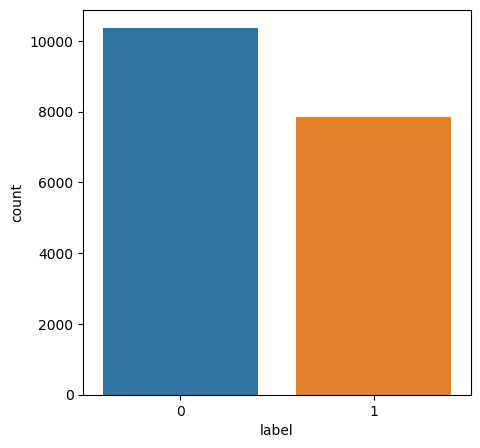

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df,x='label')

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



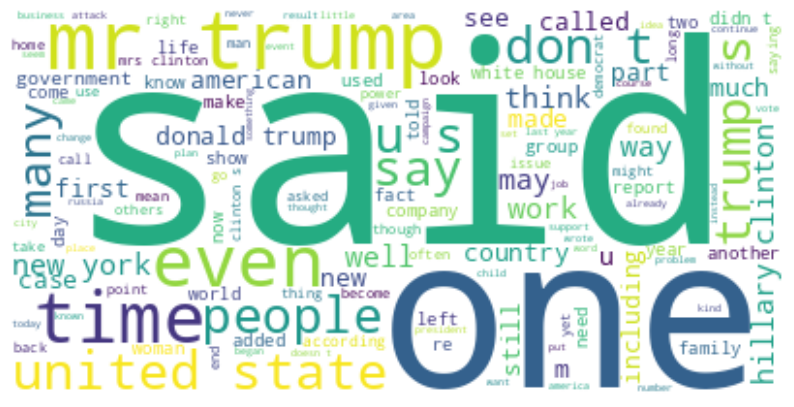

In [ ]:
text = " ".join(text for text in df['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Axes: xlabel='text', ylabel='Count'>

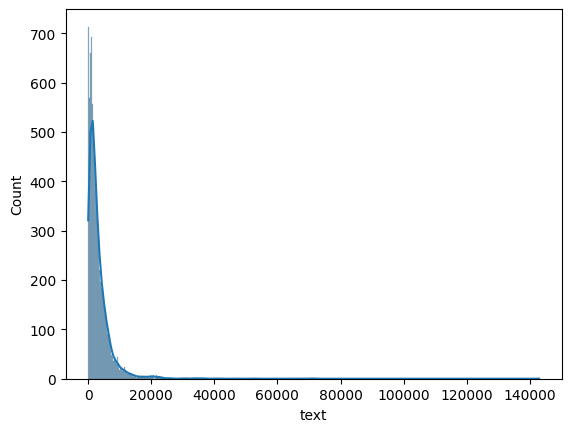

In [ ]:
sns.histplot(df,x=df[df['label']==1]['text'].str.len(),kde=True)

In [ ]:
text_fake = df.loc[df["label"] == 1, "text"]
print(text_fake.str.len())

0        3640
2        5663
3        2394
4         710
10       2186
         ... 
18199    3648
18202    2090
18204    2251
18209    1414
18210    5608
Name: text, Length: 7850, dtype: int64


In [ ]:
df[df['label']==1]['text'].str.len()

,text
0,3640
2,5663
3,2394
4,710
10,2186
...,...
18199,3648
18202,2090
18204,2251
18209,1414


<Axes: xlabel='text', ylabel='Count'>

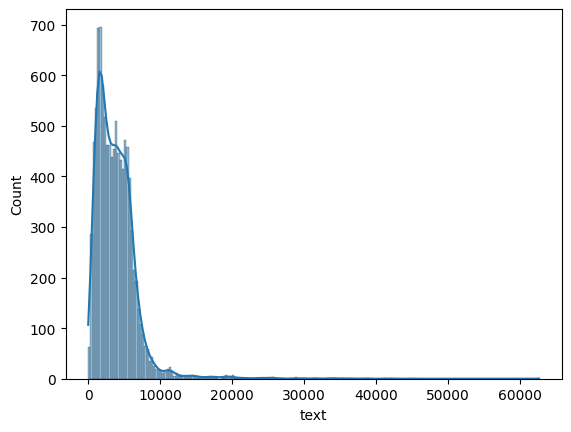

In [ ]:
sns.histplot(df,x=df[df['label']==0]['text'].str.len(),kde=True)

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
y = df['label']
x = df.iloc[:,:3]
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.7,random_state=42)

In [ ]:
x

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide: we didn’t even see comey’s let...
1,"FLYNN: Hillary Clinton, Big Woman Campus - Bre...",Daniel J. Flynn,ever get feeling life circle roundabout rather...
2,Why Truth Might Get You Fired,Consortiumnews.com,"why truth might get you fired october 29, 2016..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...
4,Iranian woman jailed fictional unpublished sto...,Howard Portnoy,print an iranian woman sentenced six year pris...
...,...,...,...
18206,Rapper T.I.: Trump ’Poster Child For White Sup...,Jerome Hudson,rapper t. i. unloaded black celebrity met dona...
18207,"N.F.L. Playoffs: Schedule, Matchups Odds - The...",Benjamin Hoffman,when green bay packers lost washington redskin...
18208,Macy’s Is Said Receive Takeover Approach Hudso...,Michael J. de la Merced and Rachel Abrams,the macy’s today grew union several great name...
18209,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"nato, russia to hold parallel exercises in bal..."


In [ ]:
corpus_train[:5]

[]

In [ ]:
x_train['text'] = x_train['text'].apply(get_corpus_train)
x_train['title'] = x_train['title'].apply(get_corpus_train)
x_train['author'] = x_train['author'].apply(get_corpus_train)


In [ ]:
x_test['text'] = x_test['text'].apply(get_corpus_test)
x_test['title'] = x_test['title'].apply(get_corpus_test)
x_test['author'] = x_test['author'].apply(get_corpus_test)


In [ ]:
corpus_train = set(corpus_train)
corpus_test = set(corpus_test)

In [ ]:
# Ngram Analysis:
def get_top_tweet_bigrams(corpus_train, n=None):
    vec = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vec.fit_transform(corpus_train)
    # print(vec.vocabulary_)
    # print(bag_of_words)
    # return pd.DataFrame(bag_of_words.toarray(),columns=vec.get_feature_names_out())
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
get_top_tweet_bigrams(corpus_test)[0]

matrix([[1, 2, 1, ..., 1, 1, 1]])

<Axes: >

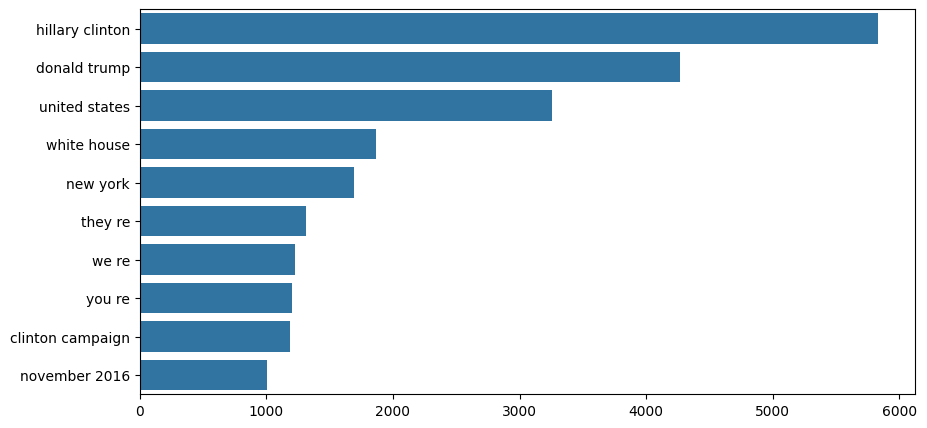

In [ ]:
plt.figure(figsize=(10,5))
fake_df = df[df['label']==1]
top_tweet_bigrams=get_top_tweet_bigrams(fake_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

<Axes: >

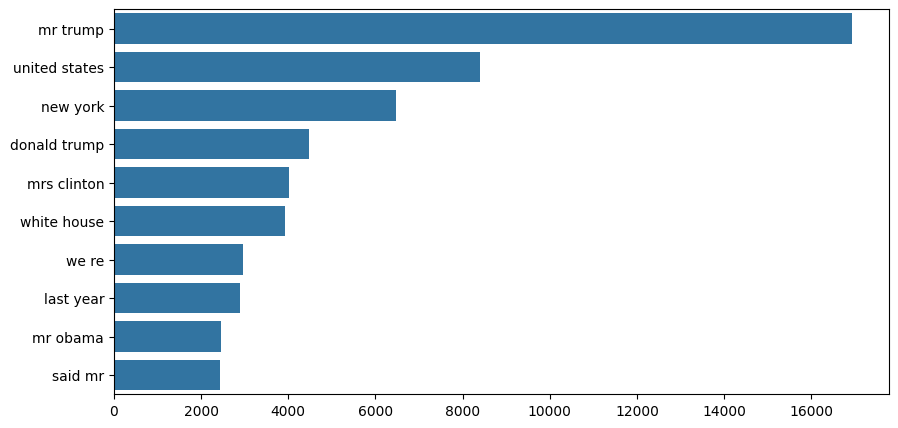

In [ ]:
plt.figure(figsize=(10,5))
true_df = df[df['label']==0]
top_tweet_bigrams=get_top_tweet_bigrams(true_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide: we didn’t even see comey’s let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman Campus - Bre...",Daniel J. Flynn,ever get feeling life circle roundabout rather...,0
2,2,Why Truth Might Get You Fired,Consortiumnews.com,"why truth might get you fired october 29, 2016...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos 15 civilians killed in single us airstr...,1
4,4,Iranian woman jailed fictional unpublished sto...,Howard Portnoy,print an iranian woman sentenced six year pris...,1
...,...,...,...,...,...
18206,20795,Rapper T.I.: Trump ’Poster Child For White Sup...,Jerome Hudson,rapper t. i. unloaded black celebrity met dona...,0
18207,20796,"N.F.L. Playoffs: Schedule, Matchups Odds - The...",Benjamin Hoffman,when green bay packers lost washington redskin...,0
18208,20797,Macy’s Is Said Receive Takeover Approach Hudso...,Michael J. de la Merced and Rachel Abrams,the macy’s today grew union several great name...,0
18209,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"nato, russia to hold parallel exercises in bal...",1


In [ ]:
x_train.drop(['author','title'],axis=1,inplace=True)

In [ ]:
x_test.drop(['author','title'],axis=1,inplace=True)

In [ ]:
tf_vectorizer = TfidfVectorizer()
# X = tf_vectorizer.fit_transform(x_train)
x_tf_train = tf_vectorizer.fit_transform(x_train['text']).toarray()
# x_tf_train = pd.DataFrame(X.toarray(),columns=tf_vectorizer.get_feature_names_out())
x_tf_test = tf_vectorizer.transform(x_test['text'])

In [ ]:
x_tf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.014s
accuracy:   0.945
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3419
           1       0.95      0.93      0.94      2616

    accuracy                           0.94      6035
   macro avg       0.94      0.94      0.94      6035
weighted avg       0.94      0.94      0.94      6035

confusion matrix:
[[3279  140]
 [ 194 2422]]


In [ ]:
text_train = [item['text']for item in ds_train]
label_train = [item['label']for item in ds_train]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix



In [ ]:
tokenizer = Tokenizer(num_words=350)
tokenizer.fit_on_texts(x_train['text'])
sequence_train = tokenizer.texts_to_sequences(x_train['text'])
sequence_test = tokenizer.texts_to_sequences(x_test['text'])

In [ ]:
max_len = 150
padded_train = pad_sequences(sequence_train,maxlen=max_len,padding='pre')
padded_test = pad_sequences(sequence_test,maxlen=max_len,padding='pre')


In [ ]:
padded_train

array([[  0,   0,   0, ...,  13,  54,  20],
       [  4,   3, 327, ...,  19,  83,   1],
       [  0,   0,   0, ...,   9, 264,  98],
       ...,
       [118, 319,  14, ...,  11,  11,  44],
       [169,  79, 126, ..., 304,  47,   1],
       [  0,   0,   0, ..., 142, 186, 121]], dtype=int32)

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=350,output_dim=120,input_length=max_len))
lstm_model.add(LSTM(units=120))
lstm_model.add(Dropout(.5))
lstm_model.add(layer = Dense(120,  activation = 'relu'))
lstm_model.add(Dropout(.5))
lstm_model.add(layer = Dense(1,  activation = 'sigmoid'))

lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
y_train.unique()

array([1, 0])

In [ ]:
y_train = np.array(y_train,'int32')

In [ ]:
history = lstm_model.fit(padded_train, y_train, epochs = 2,validation_data=(padded_test,y_test))

Epoch 1/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 133s 333ms/step - accuracy: 0.9022 - loss: 0.2715 - val_accuracy: 0.9184 - val_loss: 0.2099
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 124s 289ms/step - accuracy: 0.9294 - loss: 0.1897 - val_accuracy: 0.9328 - val_loss: 0.1950


In [ ]:
y_pred

array([[9.9522775e-01],
       [7.7744589e-05],
       [1.6520854e-02],
       ...,
       [5.1379891e-04],
       [1.5213616e-04],
       [2.4636131e-04]], dtype=float32)

In [ ]:
y_pred = (lstm_model.predict(padded_test) > 0.5).astype("int32")
print(classification_report(y_test,y_pred))


171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3124
           1       0.93      0.91      0.92      2340

    accuracy                           0.93      5464
   macro avg       0.93      0.93      0.93      5464
weighted avg       0.93      0.93      0.93      5464



<Axes: >

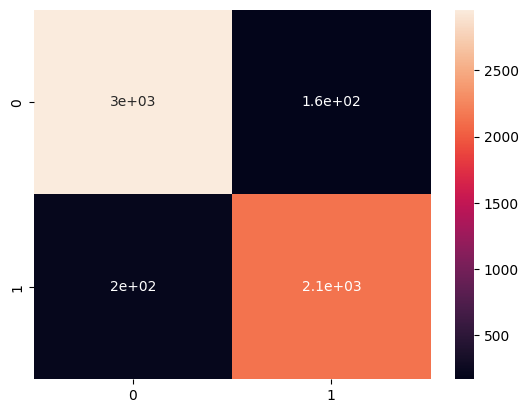

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)